# Q4

In [ ]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=np.loadtxt('dow.txt')

print(x)
#print(y)


[12121.71 12136.44 12226.73 ... 11499.25 11491.91 11478.13]


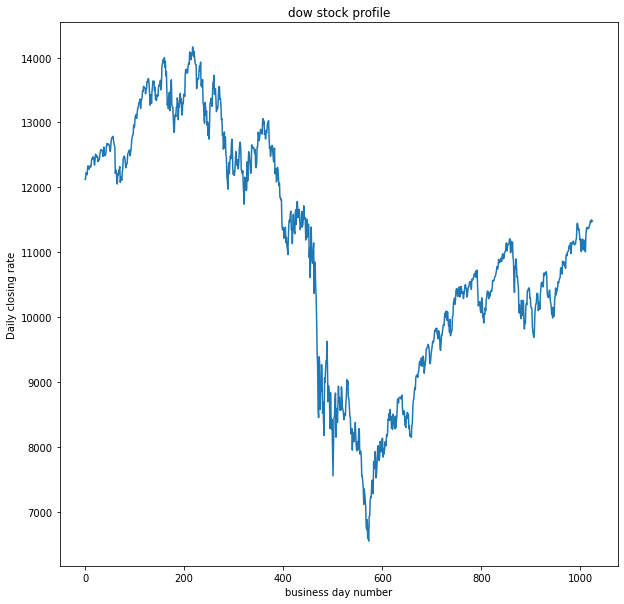

In [ ]:
#plotting graph

plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1024,1024),x)
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile')
plt.show()

In [ ]:
from numpy.fft import rfft, irfft

x_rfft=rfft(x)

In [ ]:
lim=int(0.1*len(x_rfft))
x_rfft[lim:]=[0]*len(x_rfft[lim:])

x_irfft=irfft(x_rfft)

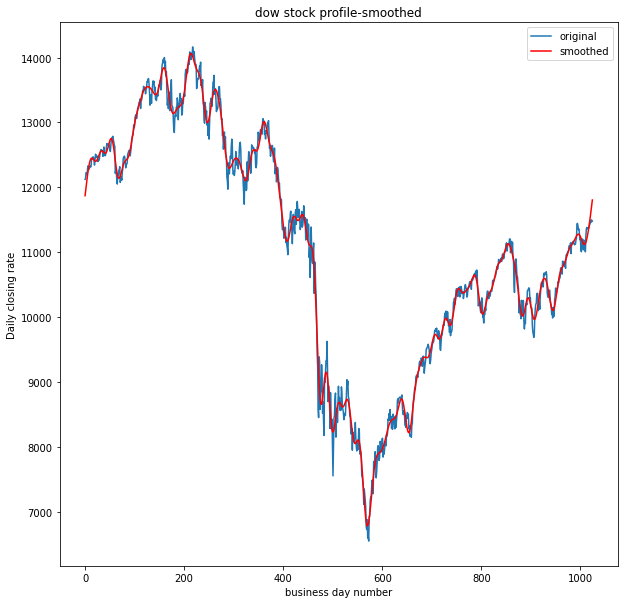

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1024,1024),x, label='original')
plt.plot(np.linspace(0,1024,1024),x_irfft, color='red', label='smoothed')
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile-smoothed')
plt.legend()
plt.show()


#we get a smoothed curve

In [ ]:
#setting all but 2% data to 0

x_rfft=rfft(x)
lim=int(0.02*len(x_rfft))
x_rfft[lim:]=[0]*len(x_rfft[lim:])

x_irfft=irfft(x_rfft)

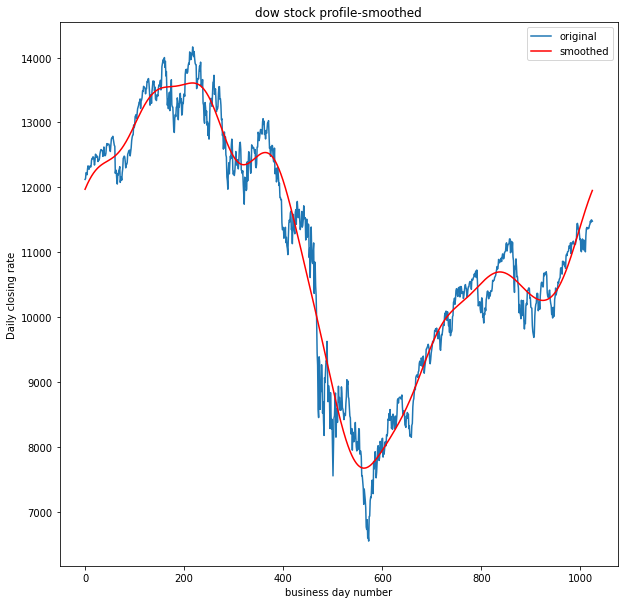

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1024,1024),x, label='original')
plt.plot(np.linspace(0,1024,1024),x_irfft, color='red', label='smoothed')
plt.xlabel('business day number')
plt.ylabel('Daily closing rate')
plt.title('dow stock profile-smoothed')
plt.legend()
plt.show()


This clearly has lot of artifacts, it has lost most its variation and the artifacts are more pornounced in the end region where the tail is trying to reach up to the same value as that of the starting. The small but distinct peaks are gone and the curve has lost most of its data.

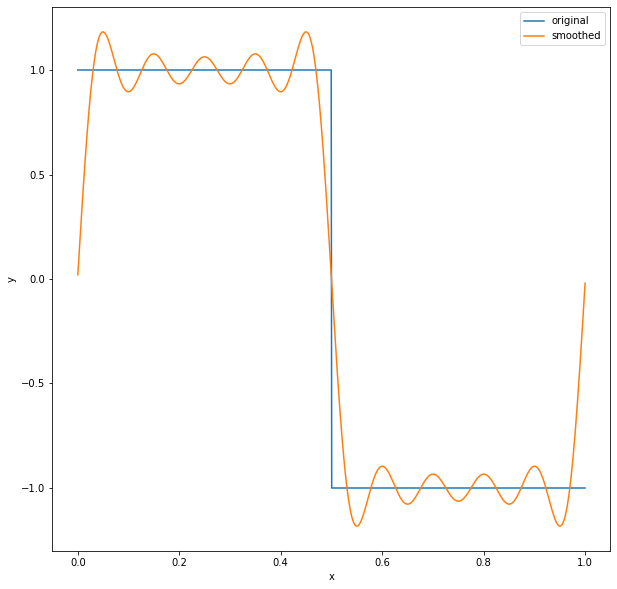

In [ ]:
#make sqaure function with amplitude and frequency one
x=np.linspace(0,1,1000)
y=[]

for i in range(1000):
  y.append(1-2*(i>=500))
  

#make rfft and irfft

y_rfft=rfft(y)
y_rfft[10:]=[0]*len(y_rfft[10:])
y_irfft=irfft(y_rfft)

plt.figure(figsize=(10,10))
plt.plot(x,y, label='original')
plt.plot(x, y_irfft, label='smoothed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




The sqaure wave given can be regarded as an odd function which is decomposed into sine waves, The sharp corners are achieved by the continual cancellation of numerous sine waves and when we discard all but 10, then inly some first few sine terms will survive, which will make the solution wigly. The solution is trying to achieve the same value at both the ends. We can examine this by increasing the retention of the paarameters.

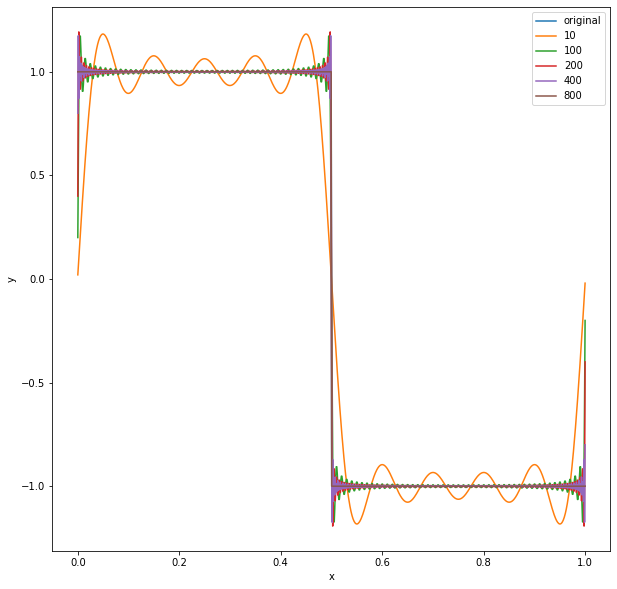

In [ ]:




plt.figure(figsize=(10,10))
plt.plot(x,y, label='original')
for i in [10, 100, 200, 400, 800]:
  y_rfft=rfft(y)
  y_rfft[i:]=[0]*len(y_rfft[i:])
  y_irfft=irfft(y_rfft)
  plt.plot(x, y_irfft, label=i)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#we should clearly see increasing convergence to the original function. which is examined more by limiting the xlim in the next graph.

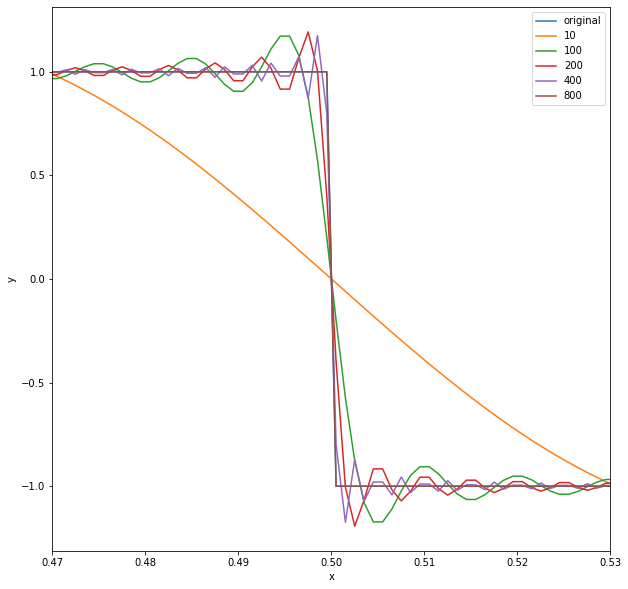

In [ ]:


plt.figure(figsize=(10,10))
plt.plot(x,y, label='original')
for i in [10, 100, 200, 400, 800]:
  y_rfft=rfft(y)
  y_rfft[i:]=[0]*len(y_rfft[i:])
  y_irfft=irfft(y_rfft)
  plt.plot(x, y_irfft, label=i)
plt.xlim(0.47, 0.53)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
#This graph clearly shows what is going on in the intricate details. 800 and original are not separable. 